In [1]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append("/jet/prs/workspace/rxrx1-utils")
from rxrx import io as rio

import settings_model

In [64]:
import preprocess_data
data = preprocess_data.rxrx_all()

Loading metadata...
Metadata shape: (125510, 10)
81224 values in ids_train
81224 values in labels_train
24 values in ids_train_debug
24 values in labels_train_debug
4492 values in ids_valid
4492 values in labels_valid
24 values in ids_valid_debug
24 values in labels_valid_debug
39794 values in ids_test
39794 values in labels_test
Total ids: 125558.0
Calculating normalization factors by experiment...


In [72]:
import dataset_generator
datasets, loaders = dataset_generator.create_datasets_and_loaders(data, settings_model.batch_size, 
                                                                  settings_model.basepath_data, 
                                                                  settings_model.original_image_size)

Traceback (most recent call last):
  File "/jet/var/python/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/jet/var/python/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/jet/var/python/lib/python3.6/shutil.py", line 484, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/jet/var/python/lib/python3.6/shutil.py", line 482, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/jet/tmp/pymp-5pa55jn2'


Image batch size: torch.Size([64, 6, 128, 128]). Label batch size: 64.
Average pixel value in batch: 0.28608
Stddev pixel value in batch: 1.02075


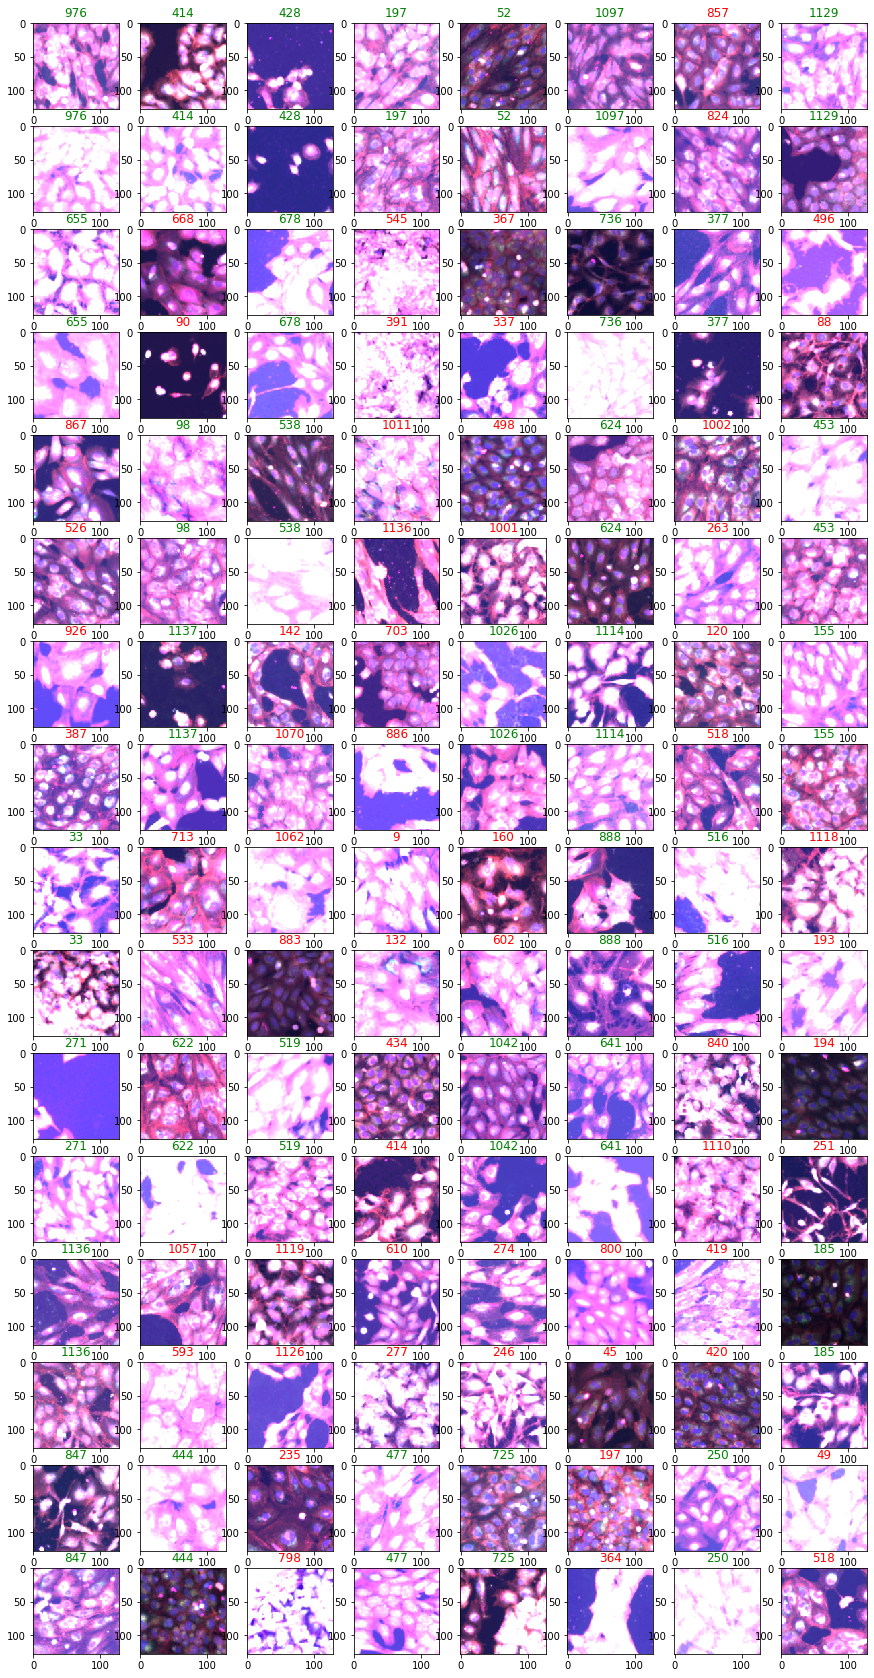

In [73]:
dataset_generator.show_batch(loaders["train"])    
# dataset_generator.show_batch(loaders["valid"])

In [69]:
# class WChi2Loss(torch.nn.Module):
#     """
#     Weighted Chi Squared Loss.
#     Based on: https://zpascal.net/cvpr2014/Taigman_DeepFace_Closing_the_2014_CVPR_paper.pdf
#     """

#     def __init__(self, margin=2.0):
#         super(WChi2Loss, self).__init__()
# #         self.margin = margin

#     def forward(self, output1, output2, label):
# #         euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)
# #         loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
# #                                       (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

#         return None

In [8]:
# class SimpleEucliDistLoss(torch.nn.Module):
#     """
#     Simple Euclidean Distance Loss.
#     """

#     def __init__(self, margin=2.0):
#         super(SimpleEucliDistLoss, self).__init__()
# #         self.margin = margin

#     def forward(self, output1, output2, label):
#         sig = nn.Sigmoid()
#         euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)
#         loss = torch.mean(torch.pow(euclidean_distance, 2))
# #         loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
# #                                       (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

#         return (loss)        
# #         return sig(loss)

In [16]:
# class CosSimilLoss(torch.nn.Module):
#     """
#     Simple Cosine Similarity Loss.
#     """

#     def __init__(self, margin=2.0):
#         super(CosSimilLoss, self).__init__()

#     def forward(self, output1, output2, label):
#         print(output1.size(), output2.size(), label.size())
#         print(output1, output2, label)
#         stoppp
#         loss = torch.mean(F.cosine_similarity(output1, output2))

#         return loss

In [21]:
# import numpy as np
# input1 = torch.tensor(np.array([[0,0,0],[0,0,0]], dtype="float"))
# input2 = torch.tensor(np.array([[0,0,0],[0,0,0]], dtype="float"))
# cos = nn.CosineSimilarity(dim=0, eps=1e-6)
# cos(input1, input2)

tensor([0., 0., 0.], dtype=torch.float64)

In [115]:
import glob
output_dir = sorted(glob.glob("/jet/prs/workspace/models/siamese-cell/*"))[-1]
print(output_dir)

/jet/prs/workspace/models/siamese-cell/20190804_121919


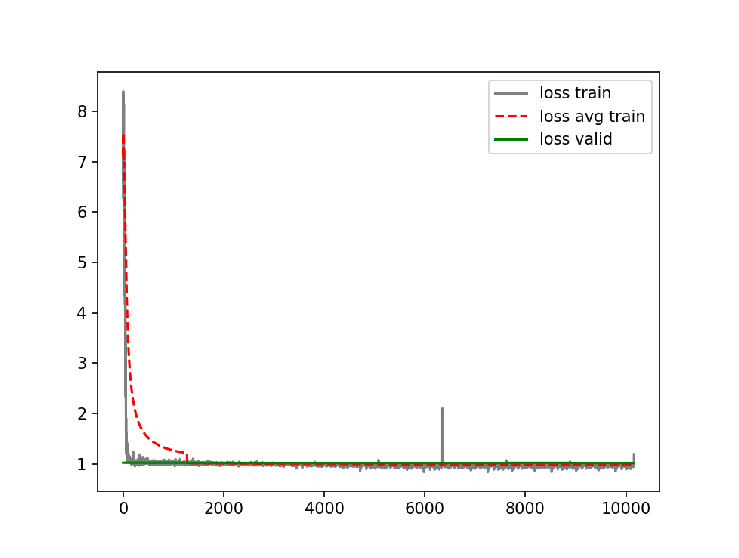

In [123]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,10))
plt.imshow(plt.imread(os.path.join(output_dir, "loss_history.png")))
plt.axis("off")
plt.show()

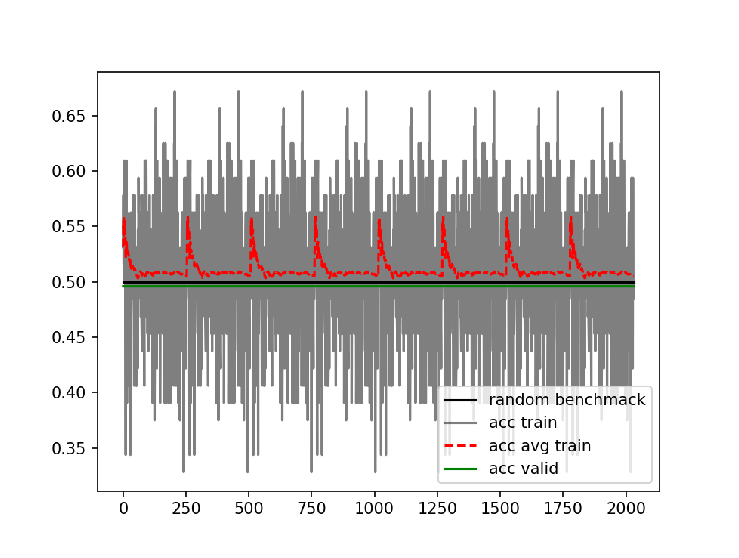

In [124]:
fig = plt.figure(figsize=(15,10))
plt.imshow(plt.imread(os.path.join(output_dir, "acc_history.png")))
plt.axis("off")
plt.show()

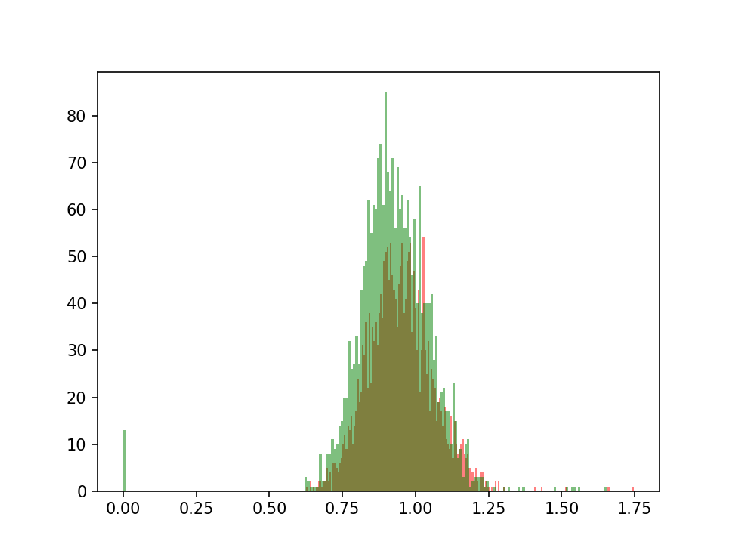

In [125]:
fig = plt.figure(figsize=(15,10))
plt.imshow(plt.imread(os.path.join(settings_model.root_path, "tmp", "eucl_dist.png")))
plt.axis("off")
plt.show()